In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Memuat dataset
dataset = pd.read_csv('CreditDataset.csv')

# Menampilkan informasi dataset
print(dataset.info())  # Melihat tipe data
print(dataset.head())  # Melihat beberapa baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
None
    x1  

In [3]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Memuat dataset
dataset = pd.read_csv('CreditDataset.csv')

# Menampilkan informasi dataset
print(dataset.info())  # Melihat tipe data
print(dataset.head())  # Melihat beberapa baris pertama

# Memisahkan fitur (X) dan target (y)
X = dataset.drop(columns=["Class"])  # Semua kolom kecuali target
y = dataset["Class"]                # Kolom target

# Mengidentifikasi kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encoding untuk data kategorikal
# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn.
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' menghindari multikolinearitas
X_encoded = encoder.fit_transform(X[categorical_columns])

# Menggabungkan kolom numerik dan yang sudah di-encode
numerical_columns = X.select_dtypes(include=['int64']).columns
X_numerical = X[numerical_columns].values
X_processed = pd.DataFrame(
    data=np.hstack([X_numerical, X_encoded]),
    columns=list(numerical_columns) + list(encoder.get_feature_names_out(categorical_columns))
)

# Normalisasi (Scaling) data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Membagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Shape of Training Data: {X_train.shape}")
print(f"Shape of Testing Data: {X_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
None
    x1  

In [4]:
# Membuat model klasifikasi SVM
svc_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)  # Menggunakan kernel RBF (default)
svc_model.fit(X_train, y_train)  # Melatih model pada data training

# Melakukan prediksi pada data testing
y_pred = svc_model.predict(X_test)
y_proba = svc_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (untuk ROC)


In [5]:
# Matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (Akurasi, Presisi, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)  # ROC untuk kelas positif
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.2f}")


Confusion Matrix:
[[196  13]
 [ 59  32]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.94      0.84       209
           2       0.71      0.35      0.47        91

    accuracy                           0.76       300
   macro avg       0.74      0.64      0.66       300
weighted avg       0.75      0.76      0.73       300


AUC: 0.20


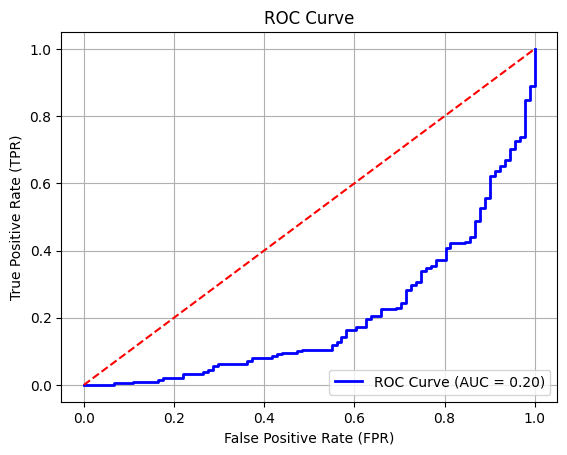

In [6]:
import matplotlib.pyplot as plt

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
